In [1]:
import numpy as np
import os
#from scipy.misc import imread, imresize, imshow
import datetime
import os
import cv2
from PIL import Image
from os import listdir
from os.path import isfile, join

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

C:\Users\medhy\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\medhy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\medhy\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
np.random.seed(30)
import random as rn
rn.seed(30)
from keras import backend as K
import tensorflow as tf
tf.random.set_seed(30)

In [3]:
data_path="C:\\AshiMinty\\Ashish\\upGrad\\masters\\Thesis\\dataset\\data"

In [4]:
folders = [f for f in listdir(data_path)]

In [5]:
data_files = {}
file_count = []
for folder in folders:
    path = data_path + "\\" + folder
    files = [path + "\\" + f for f in listdir(path)]
    data_files[folder] = files
    

In [6]:
for folder,files in data_files.items():
    file_count.append([folder, len(files)])
file_count = pd.DataFrame(file_count, columns=['Action', 'FileCount'])
file_count

,Action,FileCount
0,Drink,106
1,Jump,76
2,Pick,29
3,Pour,142
4,Push,226
5,Run,211
6,Sit,51
7,Stand,60
8,Turn,77
9,Walk,128


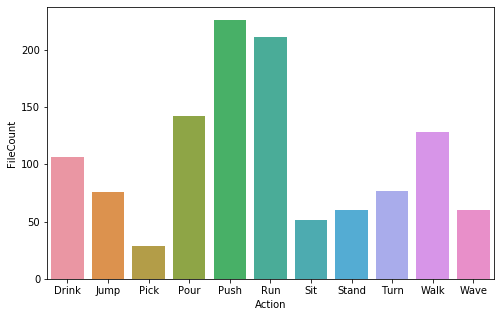

In [7]:
plt.figure(figsize=(8,5))
sns.barplot(y = 'FileCount', x='Action', data = file_count)

In [8]:
def plot_image(images, captions):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(50)
    count = 0
    for ax,image in zip(axes, images):
        ax.imshow(image)
        ax.set_title(captions[count])
        count += 1

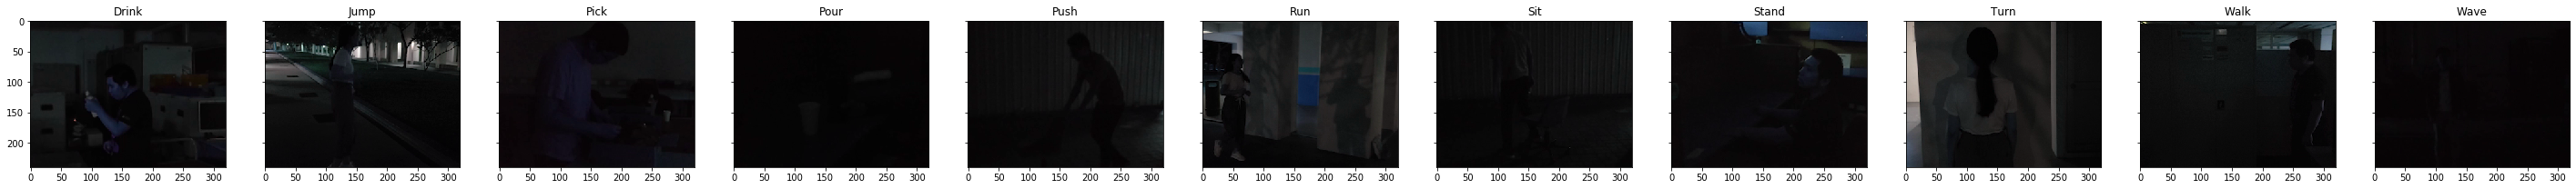

In [9]:
images = []
captions = []
for folder,files in data_files.items():
    cam = cv2.VideoCapture(files[0])
    ret,frame = cam.read()
    images.append(frame)
    captions.append(folder)

plot_image(images, captions)

In [10]:
os.getcwd()

'C:\\Users\\medhy\\Data Science\\ARID'